# Agrithon: An Analysis for Features Contributing to Crop Disease

## Introduction to the Problem

This project aims to solve a critical classification problem in agriculture: **predicting the presence of a plant disease based on observable symptoms and environmental factors**. Early and accurate detection of plant diseases is crucial for farmers to prevent crop loss, optimize the use of treatments like fungicides, and ensure food security.

The central question we are trying to answer is: **Can we build a reliable machine learning model that can accurately classify whether a plant has a disease, and if so, which specific symptoms are the most powerful predictors?** By answering this, we can move from a subjective assessment of plant health to a more data-driven diagnostic approach.

## The Dataset

The data for this project is a synthetic dataset sourced from Kaggle, designed to simulate a real-world agricultural survey.

**Source**: [Agri-thon Round 1: Synthetic Disease Presence Dataset](https://www.kaggle.com/datasets/mohammedarfathr/agrithon-round-1)

**About the Data**: The dataset consists of 150 samples and 31 columns. Each row represents an observation of a plant, and each column is a "Yes/No" question regarding a specific symptom (e.g., 'Is there a yellow halo around the spots?') or environmental condition (e.g., 'Was there poor air circulation in the field?'). 

The final column, 'Disease_Present', is our target variable, indicating whether the plant was diagnosed with the disease ('Present' or 'Not Present').

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [32]:
random_seed = 42 # for reproducibility

In [33]:
df = pd.read_csv('synthetic_disease_presence_30_questions.csv')
df.describe()

,Is there a yellow halo around the spots?,Are the leaf spots circular with concentric rings?,Does the disease begin on the lower leaves?,Are the lesions expanding over time?,Is the center of the spot dry and brown?,Are multiple spots merging to form large blotches?,Does the leaf show signs of early yellowing?,Are stems or fruits also affected?,Are the affected leaves wilting?,Is the infection spreading upward on the plant?,...,Are the leaf veins visible through the lesion?,Is the damage uniform across the field?,Was there previous history of Early Blight in this field?,Is the farmer using resistant tomato varieties?,Was any fungicide recently applied?,Was there poor air circulation in the field?,Was the field irrigated from overhead sprinklers?,Are pruning and sanitation practices followed?,Is there any other crop in the field showing similar spots?,Disease_Present
count,150,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,150
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,Present
freq,108,108,110,112,113,103,112,106,106,100,...,106,112,105,114,103,105,105,115,114,77


## Pre-processing the Data

Before any analysis or modeling, the data required a crucial pre-processing step: **numerical encoding**.

Machine learning algorithms perform mathematical operations and therefore require numerical input. Our dataset's features are categorical, with 'Yes' and 'No' answers. To prepare the data for analysis, we perform the following mapping:

* `'Yes'` is converted to `1`
* `'No'` is converted to `0`
* The target variable `'Present'` is converted to `1`
* The target variable `'Not Present'` is converted to `0`

This simple yet essential step transforms our entire dataset into a numerical format, making it possible to calculate correlations and train classification models.

In [34]:
for column in df.columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0, 'Present': 1, 'Not Present': 0}).astype(int)

In [35]:
df.head()

,Is there a yellow halo around the spots?,Are the leaf spots circular with concentric rings?,Does the disease begin on the lower leaves?,Are the lesions expanding over time?,Is the center of the spot dry and brown?,Are multiple spots merging to form large blotches?,Does the leaf show signs of early yellowing?,Are stems or fruits also affected?,Are the affected leaves wilting?,Is the infection spreading upward on the plant?,...,Are the leaf veins visible through the lesion?,Is the damage uniform across the field?,Was there previous history of Early Blight in this field?,Is the farmer using resistant tomato varieties?,Was any fungicide recently applied?,Was there poor air circulation in the field?,Was the field irrigated from overhead sprinklers?,Are pruning and sanitation practices followed?,Is there any other crop in the field showing similar spots?,Disease_Present
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,1,0,...,1,0,1,1,0,1,1,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,1,1,1,1,0,...,0,0,1,0,0,0,1,1,0,1


In [36]:
df_possible_features = df.drop(columns=['Disease_Present'])
df_target = df['Disease_Present']

## Data Understanding and Visualization

To understand the relationships within the data, we conduct an Exploratory Data Analysis (EDA) focused on two key questions: "Are any of our features redundant?" and "Which features are the most predictive of the disease?"

### A. Feature-to-Feature Correlation (Checking for Redundancy)

We start by creating a **heatmap** of a correlation matrix for all 30 features. This visualization helps us spot features that are highly correlated with each other (a problem known as multicollinearity).

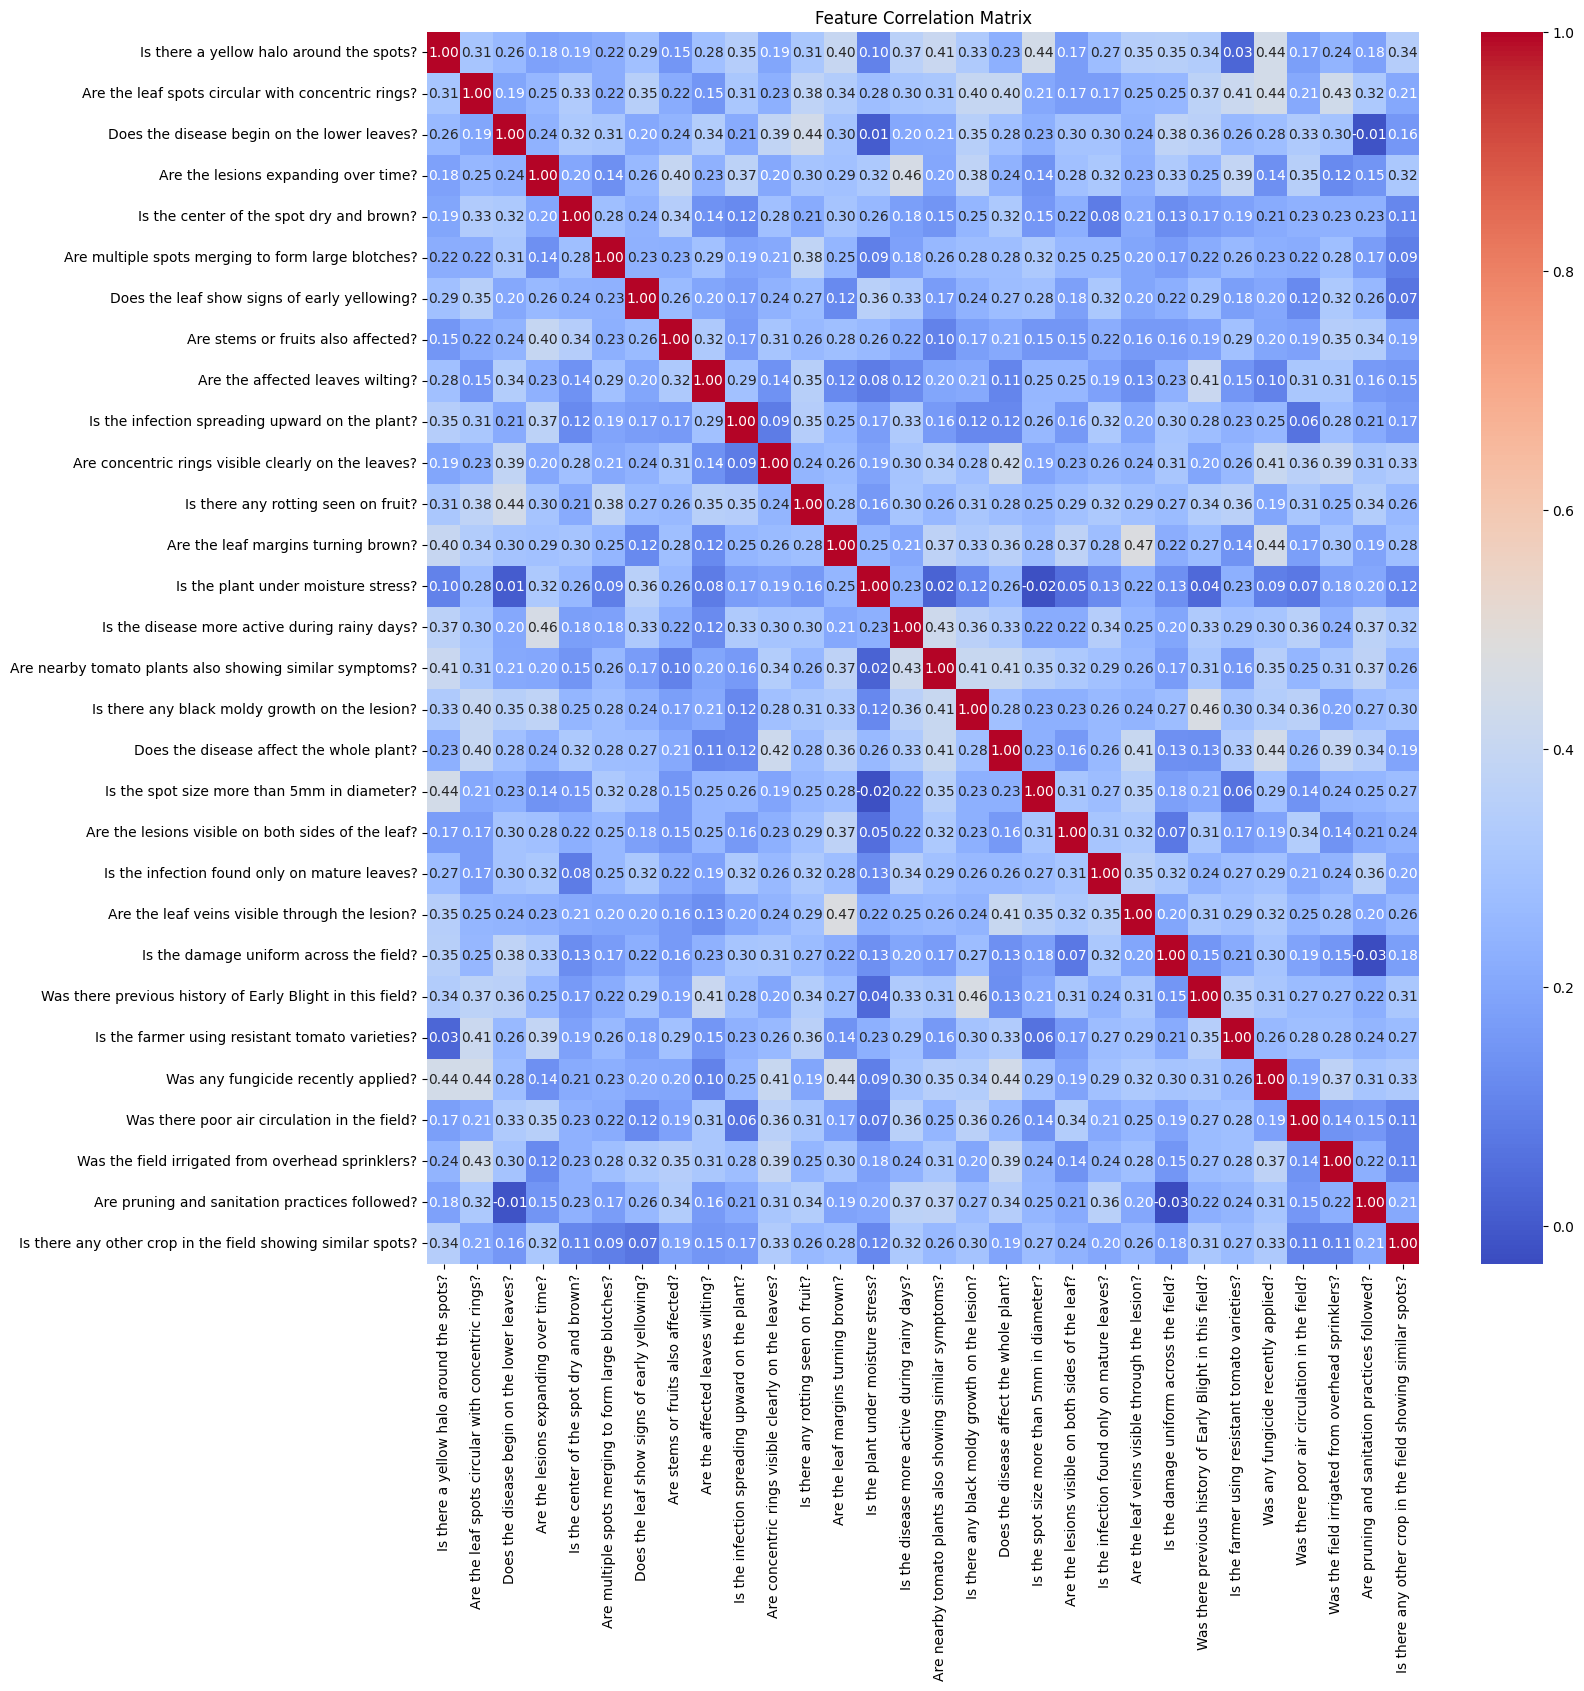

In [37]:
corr = df_possible_features.corr()

plt.figure(figsize=(16, 16))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

**Insight**: The heatmap revealed that most features had a weak positive correlation with each other. Crucially, there were no pairs with a very high correlation (e.g., > 0.7), which would have suggested they were redundant.

**Relation to Modeling**: This was an important "safety check." It told us that we didn't need to remove any features for being duplicates, and each one could potentially offer unique information to our model.

### B. Feature-to-Target Correlation (Finding the Best Predictors)

Next, we calculated the correlation of every feature directly with our target variable, `Disease_Present`, and visualized the results in a sorted bar chart.

*Note that if we had any redundant features from last step, we would have only chosen one of the set of redundant features based on simplicity.*

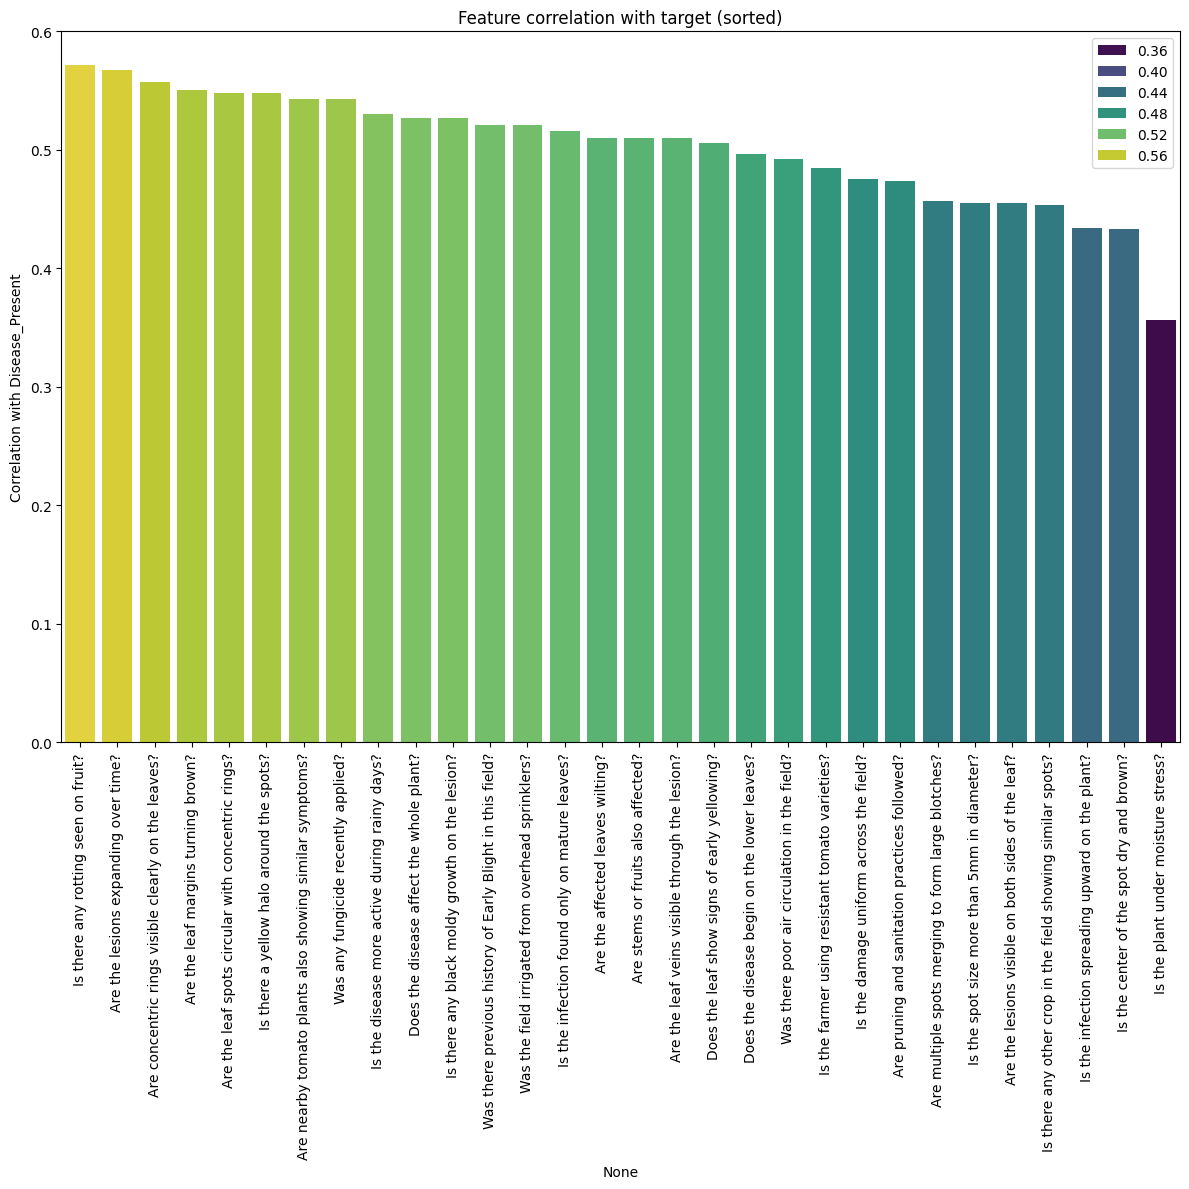

In [38]:
feature_corr = df_possible_features.apply(lambda col: col.corr(df_target)).sort_values(ascending=False)
plt.figure(figsize=(12, 12))
sns.barplot(x=feature_corr.index, y=feature_corr.values, hue=feature_corr.values, palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('Correlation with Disease_Present')
plt.title('Feature correlation with target (sorted)')
plt.tight_layout()
plt.show()

In [39]:
# Since there is a clear hierarchy, we store the sorted features for later use
features_sorted = df_possible_features.apply(lambda col: col.corr(df_target)).sort_values(ascending=False).index.tolist()

**Insight**: This chart clearly ranked the features by their predictive power. We observed that features like 'Are concentric rings visible clearly on the leaves?' and 'Are the leaf spots circular with concentric rings?' had the strongest relationship with the presence of the disease. Conversely, features like 'Is the farmer using resistant tomato varieties?' had almost no correlation.

**Relation to Modeling**: This visualization was the cornerstone of our feature selection strategy. Instead of using all 30 features blindly, this chart allowed us to make a data-driven decision to focus on a smaller subset of the most promising features.

## Modeling

Our modeling approach was designed to be systematic and experimental. We aimed to find the best-performing model by testing different feature sets and model architectures.

**Models Chosen**:
We started by testing a couple of common and powerful classification models to establish a performance baseline:

* Random Forest
* Logistic Regression
* Decision Tree
* XGBoost
* Naive Bayes
* SVM
* KNN

Our strategy was to first use these models to determine the optimal number of features to use, and then to fine-tune the best-performing model.

Because this is an excessive number of models, for future testing, analysts can choose to omit certain models. 

In [40]:
train_X, test_X, train_y, test_y = train_test_split(df_possible_features, df_target, test_size=0.2, random_state=random_seed, stratify=df_target)

In [ ]:
def get_recall_score(n: int, model):
    X = train_X
    y = train_y
    correlations = X.corrwith(y).abs()
    top_n_features = correlations.nlargest(n).index.tolist()
    X_top_n = X[top_n_features]
    scores = cross_val_score(model, X_top_n, y, cv=5, scoring='recall') # we use cross validation to get a more robust estimate
    return scores.mean()

In [ ]:
# This code cell can take a long time to run, so feel free to skip it if you have a model and n value in mind
# You can also reduce the range of models or n_list to speed it up

models = {
    'Random Forest': (RandomForestClassifier(random_state=random_seed), []),
    'Logistic Regression': (LogisticRegression(max_iter=1000, random_state=random_seed), []),
    'Decision Tree': (DecisionTreeClassifier(random_state=random_seed), []),
    'XGBoost': (XGBClassifier(eval_metric='logloss', random_state=random_seed), []),
    'Naive Bayes': (GaussianNB(), []),
    'SVM': (SVC(random_state=random_seed), []),
    'KNN': (KNeighborsClassifier(), [])
}

n_list = range(1, 25)

for model_name, (model, scores) in models.items():
    for n in n_list:
        recall = get_recall_score(n, model)
        scores.append(recall)

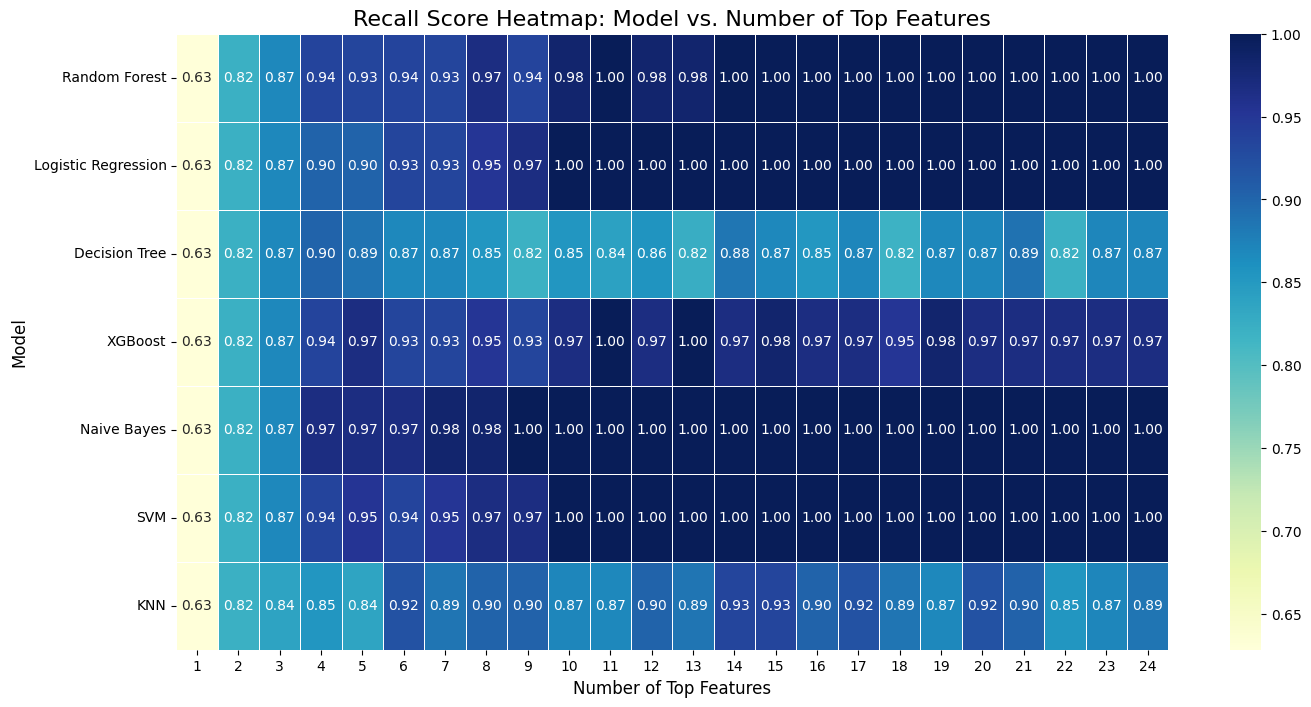

In [43]:
scores_dict = {model_name: data[1] for model_name, data in models.items()}

df_scores = pd.DataFrame(scores_dict)
df_scores.index = n_list

df_heatmap = df_scores.transpose()


plt.figure(figsize=(16, 8))

sns.heatmap(df_heatmap, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)

plt.title('Recall Score Heatmap: Model vs. Number of Top Features', fontsize=16)
plt.xlabel('Number of Top Features', fontsize=12)
plt.ylabel('Model', fontsize=12)

plt.show()

**Some factors that we look out for**

* Picking a too small `n` means that the model doesn't learn from other helpful factors, but a too bug `n` means that the model learns from too much noise, especially from columns that we established have a low correlation.

* A lot of combinations have a perfect recall of 1.00. This means that we have no false negatives in the prediction, which is a red flag especially for smaller datasets. It means it has perfectly memorized the dataset and will not perform well with new, unseen data. Also, note that these tend to be at `n > 14`, which aligns with the first point we made about incorporating too much noise. 

* Models that fluctuate are also red flags, because they are very sensitive to the data presented and have a lack of generalization. This is evident in the Decision tree, that fluctuates between 0.82 and 0.97. 

For our analysis, I chose to focus on a **Random Forest** model with `n=11`, because of its "high but not too high" n value, a consistent score, and a high enough recall that doesn't feel like overfitting (Beyond 11 is also flat and presents diminishing returns) However, users can feel free to choose a different model and n value and experiment with it. 

Because our dataset is small, tuning the hyperparameters is unlikely to yield any significant results. Again, users are encouraged to experiment with tuning, especially with larger datasets. 

In [44]:
model = RandomForestClassifier(random_state=random_seed) # DECIDE ON A MODEL AND ENTER IT HERE
n = 11 # DECIDE ON A NUMBER OF FEATURES AND ENTER IT HERE

In [45]:
train_X = train_X[features_sorted[:n]]
test_X = test_X[features_sorted[:n]]

In [46]:
model.fit(train_X, train_y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Evaluation

**Evaluation Metric: Recall**

For a disease detection problem, the most critical error is a false negative—failing to detect a disease when it is actually present. To minimize this specific error, we chose Recall as our primary evaluation metric.

Recall = True Positives / (True Positives + False Negatives)

A high recall score means our model is effective at finding all the positive cases.

In [47]:
predictions = model.predict(test_X)

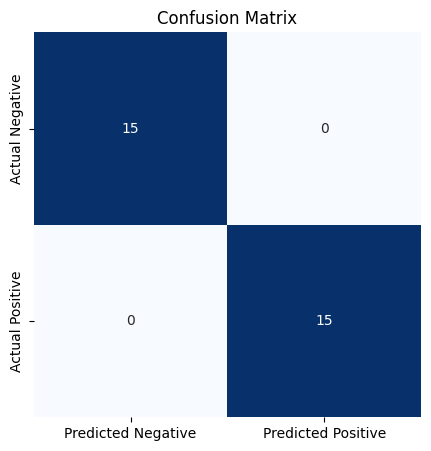

In [48]:
cm = confusion_matrix(test_y, predictions)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.show()

In [49]:
print(classification_report(test_y, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Because we only tested on 30 values, recall changed significantly from the 120 values we cross-fold validated on earlier. However, False Negatives are noticeably less than False positives. More data can be used to test for a wider range. 

## Storytelling

Our journey began with a simple question: can we reliably predict plant disease from a list of symptoms? We started with 30 potential clues and, through exploratory analysis, quickly identified a smaller group of top predictors. Our initial modeling showed promise but also highlighted a critical danger: a simple Decision Tree could be easily tricked into "memorizing" the data, leading to a perfect but misleading score.

The key insight came from comparing multiple models. An ensemble model, the Random Forest, proved to be the superior choice. It was able to achieve a high recall score of over 90% without falling into the overfitting trap. This tells us that by combining the "opinions" of many decision trees, we can build a model that is both powerful and robust.

Also identifying the features that we determined contributed to disease presence: 

In [50]:
print("Features that contribute to disease presence:")
for feature in features_sorted[:n]:
    print(feature)

print("\n\nFeatures that did not contribute to disease presence:")
for feature in features_sorted[n:]:
    print(feature)

Features that contribute to disease presence:
Is there any rotting seen on fruit?
Are the lesions expanding over time?
Are concentric rings visible clearly on the leaves?
Are the leaf margins turning brown?
Are the leaf spots circular with concentric rings?
Is there a yellow halo around the spots?
Are nearby tomato plants also showing similar symptoms?
Was any fungicide recently applied?
Is the disease more active during rainy days?
Does the disease affect the whole plant?
Is there any black moldy growth on the lesion?


Features that did not contribute to disease presence:
Was there previous history of Early Blight in this field?
Was the field irrigated from overhead sprinklers?
Is the infection found only on mature leaves?
Are the affected leaves wilting?
Are stems or fruits also affected?
Are the leaf veins visible through the lesion?
Does the leaf show signs of early yellowing?
Does the disease begin on the lower leaves?
Was there poor air circulation in the field?
Is the farmer us

According to the model, the features that contribute most to a diagnosis are the unambiguous, advanced symptoms of the disease.

* **Distinct Lesion Characteristics**: The model heavily weights the quality of the spots, not just their presence. Examples are 'Are concentric rings visible clearly', 'Is there a yellow halo around the spots?', and 'Is there any black moldy growth on the lesion?'

* **Severe Progression**: Symptoms like 'Is there any rotting seen on fruit?' and 'Does the disease affect the whole plant?' are signs of a well-established infection. 

* **Contagion and Environment**: The model also picked up on clues that the disease is active and spreading, such as 'Are nearby tomato plants also showing similar symptoms?' and 'Is the disease more active during rainy days?'.

* The **surprising feature** here is 'Was any fungicide recently applied?'. This is likely a strong predictor because farmers only apply fungicide when they already see or strongly suspect a disease. The model learned that this action is a powerful proxy for human observation of the disease. Future analyses could omit this feature and see if the recall changes. 


The model also found that many features which seem important are actually not reliable enough for a final diagnosis. These fall into two main categories:

* **General "Sick Plant" Symptoms**: Many non-contributing features are things that could be wrong with any plant for any number of reasons. 'Are the affected leaves wilting?', 'Does the leaf show signs of early yellowing?', and 'Is the plant under moisture stress?' are too generic and don't specifically point to this disease.

* **Background & Farming Practices**: The model concluded that the current, visible evidence is far more important than the general field conditions. Factors like 'Was there previous history of Early Blight', 'Was there poor air circulation', and 'Is the farmer using resistant varieties?' are risk factors, not diagnostic proof.

* The most **interesting insight** comes from the symptoms it ignored, like 'Are multiple spots merging to form large blotches?' and 'Is the spot size more than 5mm in diameter?'. This tells us the model learned that the specific appearance of a spot (like having rings or mold) is a much more powerful clue than its size or how many there are. Future analyses could include more appearance-based features to see if they improve predictions. 

## Limitations

This analysis would benefit from further exploration and includes several sections where readers can experiment and further improve analysis:

* Limited data: We only had 150 rows to work with, 120 for training and only 30 for testing. This made it suitable for exploratory analysis but needed more data so we can see the impact of the parameters we selected

* Parameter tuning: Because of limited size, experimentation with the parameters of our model would not lead to much useful results. However, analysts are encouraged to tinker with these parameters, as well as try other models and `n` sizes to visualize their outcome. 

## Impact

* **Positive Impact**: This project demonstrates a clear pathway to creating data-driven tools for agriculture. A reliable model could be integrated into a mobile app allowing farmers to quickly diagnose potential diseases by answering a simple questionnaire, or into Computer Vision infrastructure that could scan for symptoms and take action as needed  (such as [greenhouses in the Netherlands](https://youtu.be/lIvrIKaNCRE?feature=shared&t=632)). This could lead to more targeted and efficient use of fungicides, reducing both costs and environmental impact, and ultimately contributing to greater crop yields.

* **Potential Negative Impact**: Over-reliance on such a model could be a risk. If a new disease variant emerges with different symptoms, the model would fail to detect it. Furthermore, there's an ethical consideration regarding accessibility; if such a tool is only available on expensive devices or requires a paid subscription, it could create a technology gap that disadvantages smaller, less-resourced farms, widening the disparity in agricultural productivity. 

## References

Database used: [Agri-thon Round 1: Synthetic Disease Presence Dataset](https://www.kaggle.com/datasets/mohammedarfathr/agrithon-round-1)